# Make bounding boxes out of predictions for the test images

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

import tifffile as tiff
from PIL import Image, ImageDraw
from torchvision.transforms import ToPILImage  
import matplotlib.pyplot as plt

In [2]:
targets = pd.read_csv('../CSVs/targets.csv')

In [3]:
test_df = pd.read_csv('../CSVs/sample_submission.csv')

### Turn the strings in the dataframe into lists of lists

In [4]:
l = []
for rows in range(len(targets['img_size'])):
    e = list(eval(targets['img_size'][rows]))
    l.append(e)

targets['img_size'] = l

In [5]:
l2 = []
for rows in range(len(targets['original_size'])):
    e = list(eval(targets['original_size'][rows]))
    l2.append(e)

targets['original_size'] = l2

### Make some more columns

In [6]:
# the half sized images were then split into tiles.
# the tiles were named with the coordinate where it belongs in the image pre-split
# r = the y coordinate

targets['r'] = targets['filename'].map(lambda x: x.split('_')[1])

In [7]:
# the half sized images were then split into tiles.
# the tiles were named with the coordinate where it belongs in the image pre-split
# c = the x coordinate

targets['c'] = targets['filename'].map(lambda x: x.split('_')[2][:-5])

In [8]:
# save the dataframe
targets.to_csv('../CSVs/targets.csv')

### Reconstruct the tiles into the original size and put the masks where they need to go
    1. make an empty numpy zeros array in the size of the original image
    2. find the original coordinates of each target
        a. add the x coordinates to c
        b. add the y coordinates to r
        c. multiply x +c and y +r by 2
    3. add the targets to the numpy zeros array as 255

In [9]:
targets['original_filename'].unique()

array(['26dc41664', 'afa5e8098', 'b2dc8411c', 'b9a3865fc', 'c68fe75ea'],
      dtype=object)

In [10]:
# this function gets the ID of the original image as well as it's original shape

originals = sorted(os.listdir('../test/images'))[0:10:2]

original_sizes = []
for i in originals:
    d = {}
    path = os.path.join('../test/images/', i)
    array = tiff.imread(path)
    if len(array.shape) == 5:
        array = array.squeeze().transpose(1, 2, 0)
    d['filename'] = i[:-5]
    d['original_size'] = array.shape[:-1]
    original_sizes.append(d)
original_sizes

[{'filename': '26dc41664', 'original_size': (38160, 42360)},
 {'filename': 'afa5e8098', 'original_size': (36800, 43780)},
 {'filename': 'b2dc8411c', 'original_size': (14844, 31262)},
 {'filename': 'b9a3865fc', 'original_size': (31295, 40429)},
 {'filename': 'c68fe75ea', 'original_size': (26840, 49780)}]

In [11]:
# make numpy zero arrays in the shape of the original images

array_26dc41664 = np.zeros([38160, 42360], dtype='uint8')
array_afa5e8098 = np.zeros([36800, 43780], dtype='uint8')
array_b2dc8411c = np.zeros([14844, 31262], dtype='uint8')
array_b9a3865fc = np.zeros([31295, 40429], dtype='uint8')
array_c68fe75ea = np.zeros([26840, 49780], dtype='uint8')

### Visualize one mask on a resized test image

In [11]:
array_26dc41664_small = np.zeros([19080, 21180], dtype='uint8')

for i in range(len(targets)):
    if targets['original_filename'][i] == targets['original_filename'].unique()[0]:
        ymin = (int(targets['ymin'][i]) + int(targets['r'][i]))
        ymax = (int(targets['ymax'][i]) +int(targets['r'][i]))
        xmin = (int(targets['xmin'][i]) +int(targets['c'][i]))
        xmax = (int(targets['xmax'][i]) +(int(targets['c'][i])))
        array_26dc41664_small[ymin:ymax, xmin:xmax] = 255

In [12]:
x = Image.fromarray(array_26dc41664_small)

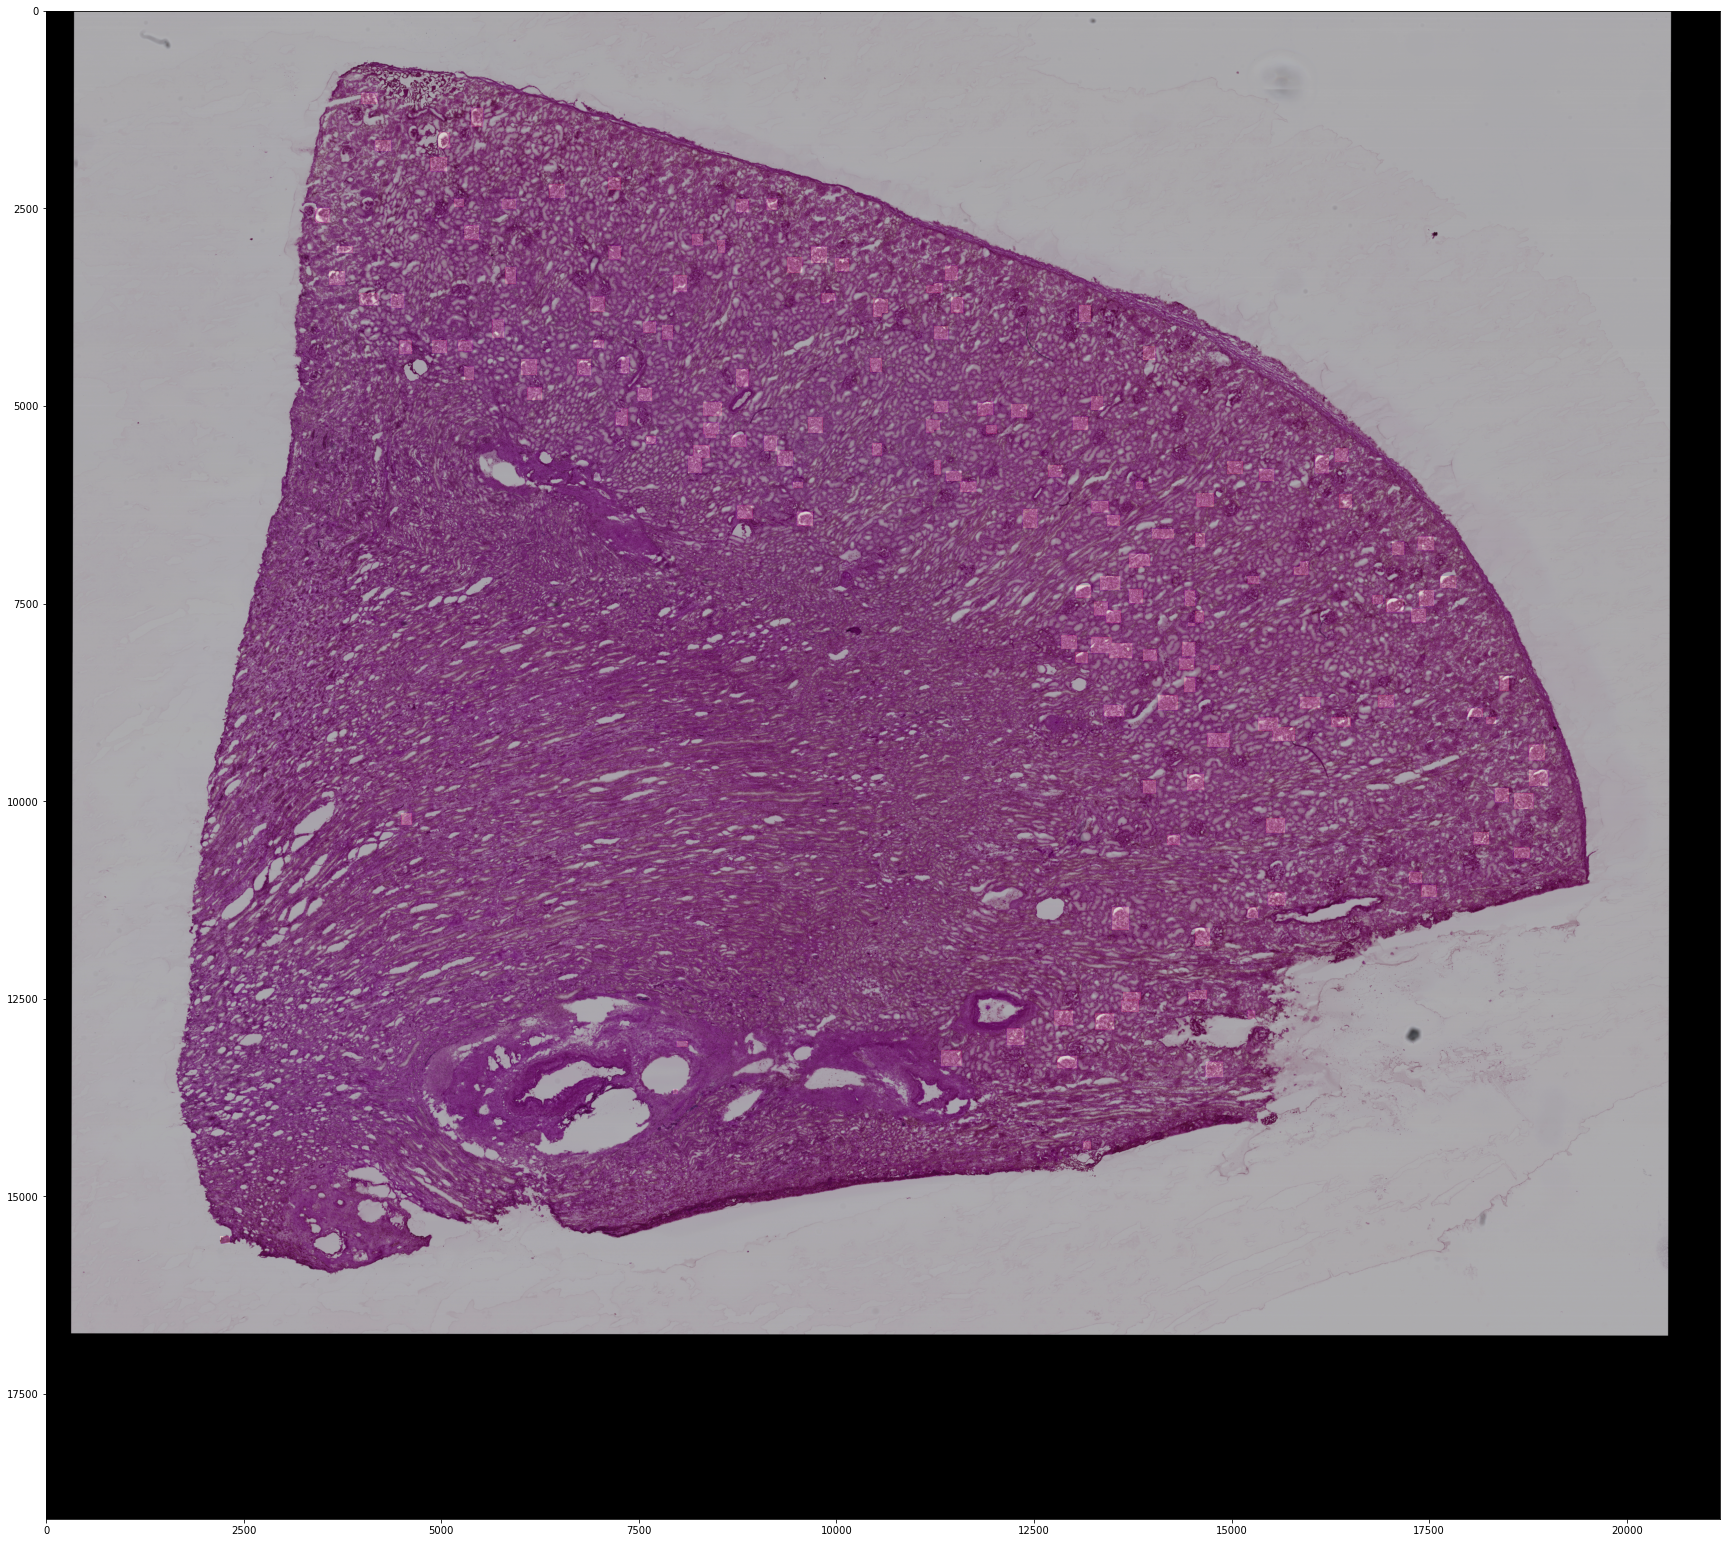

In [13]:
plt.figure(figsize=[30,30])
testimg = tiff.imread('../test/images/26dc41664_small.tiff')
if len(testimg.shape) == 5:
    testimg = testimg.squeeze().transpose(1, 2, 0)
plt.imshow(testimg)
plt.imshow(x, cmap='magma', alpha=0.2)

### make masks for all of them and save
Instead of 255, I am using 1 because the rle2mask needs the numpy array to be 1s and 0s

In [12]:
for i in range(len(targets)):
    if targets['original_filename'][i] == targets['original_filename'].unique()[0]:
        ymin = 2*(int(targets['ymin'][i]) + int(targets['r'][i]))
        ymax = 2*(int(targets['ymax'][i]) +int(targets['r'][i]))
        xmin = 2*(int(targets['xmin'][i]) +int(targets['c'][i]))
        xmax = 2*(int(targets['xmax'][i]) +int(targets['c'][i]))
        array_26dc41664[ymin:ymax, xmin:xmax] = 1
        
    elif targets['original_filename'][i] == targets['original_filename'].unique()[1]:
        ymin = 2*(int(targets['ymin'][i]) + int(targets['r'][i]))
        ymax = 2*(int(targets['ymax'][i]) +int(targets['r'][i]))
        xmin = 2*(int(targets['xmin'][i]) +int(targets['c'][i]))
        xmax = 2*(int(targets['xmax'][i]) +int(targets['c'][i]))
        array_afa5e8098[ymin:ymax, xmin:xmax] = 1
        
    elif targets['original_filename'][i] == targets['original_filename'].unique()[2]:
        ymin = 2*(int(targets['ymin'][i]) + int(targets['r'][i]))
        ymax = 2*(int(targets['ymax'][i]) +int(targets['r'][i]))
        xmin = 2*(int(targets['xmin'][i]) +int(targets['c'][i]))
        xmax = 2*(int(targets['xmax'][i]) +int(targets['c'][i]))
        array_b2dc8411c[ymin:ymax, xmin:xmax] = 1
        
    elif targets['original_filename'][i] == targets['original_filename'].unique()[3]:
        ymin = 2*(int(targets['ymin'][i]) + int(targets['r'][i]))
        ymax = 2*(int(targets['ymax'][i]) +int(targets['r'][i]))
        xmin = 2*(int(targets['xmin'][i]) +int(targets['c'][i]))
        xmax = 2*(int(targets['xmax'][i]) +int(targets['c'][i]))
        array_b9a3865fc[ymin:ymax, xmin:xmax] = 1

        
    elif targets['original_filename'][i] == targets['original_filename'].unique()[4]:
        ymin = 2*(int(targets['ymin'][i]) + int(targets['r'][i]))
        ymax = 2*(int(targets['ymax'][i]) +int(targets['r'][i]))
        xmin = 2*(int(targets['xmin'][i]) +int(targets['c'][i]))
        xmax = 2*(int(targets['xmax'][i]) +int(targets['c'][i]))
        array_c68fe75ea[ymin:ymax, xmin:xmax] = 1

In [18]:
def mask2rle(array):
    '''
    array: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = array.T.flatten()
    pixels = np.pad(pixels, ((1, 1), ))
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [19]:
test_df

id  predicted
0  b9a3865fc        NaN
1  b2dc8411c        NaN
2  26dc41664        NaN
3  c68fe75ea        NaN
4  afa5e8098        NaN

In [21]:
encode_b9a3865fc = mask2rle(array_b9a3865fc)
test_df['predicted'][0] = encode_b9a3865fc

In [27]:
encode_b2dc8411c = mask2rle(array_b2dc8411c)
test_df['predicted'][1] = encode_b2dc8411c

In [30]:
encode_26dc41664 = mask2rle(array_26dc41664)
test_df['predicted'][2] = encode_26dc41664

In [31]:
encode_c68fe75ea = mask2rle(array_c68fe75ea)
test_df['predicted'][3] = encode_c68fe75ea

In [32]:
encode_afa5e8098 = mask2rle(array_afa5e8098)
test_df['predicted'][4] = encode_afa5e8098

In [34]:
test_df.to_csv('../CSVs/real_submission.csv', index=False)

In [10]:
test = tiff.imread('../test/boxed/26dc41664_1192_3966.tiff_tgt_14.tiff')

In [20]:
kernel = np.ones((20,20),np.float32)/200
dst = cv2.filter2D(test,-1,kernel)

plt.subplot(121),plt.imshow(test, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()